# Regressão Logística - Estudo de Caso: Aprovação de Estudantes

Neste notebook, vamos explorar a **regressão logística**, uma técnica de *machine learning* usada para prever probabilidades de eventos binários (sim/não, passar/reprovar).  

Nosso exemplo será baseado em dados de estudantes que indicam **quantas horas eles estudaram** e se **passaram ou não no exame**.

## 1. Importando bibliotecas
Aqui vamos carregar as bibliotecas necessárias para manipulação de dados, visualização e criação do modelo.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

## 2. Criando os dados do exemplo
Os dados representam estudantes, suas horas de estudo e se foram aprovados ou não.

In [ ]:
data = {
    'Student_ID': [24, 41, 58, 101, 103, 215],
    'Hours_Studied': [15, 9.5, 2, 5, 6.5, 6],
    'Pass': ['Pass', 'Pass', 'Fail', 'Fail', 'Fail', 'Pass']
}

df = pd.DataFrame(data)

# Converter Pass/Fail em valores binários (0 = Fail, 1 = Pass)
df['Pass_binary'] = df['Pass'].map({'Fail': 0, 'Pass': 1})

df

,Student_ID,Hours_Studied,Pass,Pass_binary
0,24,15.0,Pass,1
1,41,9.5,Pass,1
2,58,2.0,Fail,0
3,101,5.0,Fail,0
4,103,6.5,Fail,0
5,215,6.0,Pass,1


## 3. Visualização inicial dos dados
Vamos observar a relação entre as horas de estudo e a aprovação.

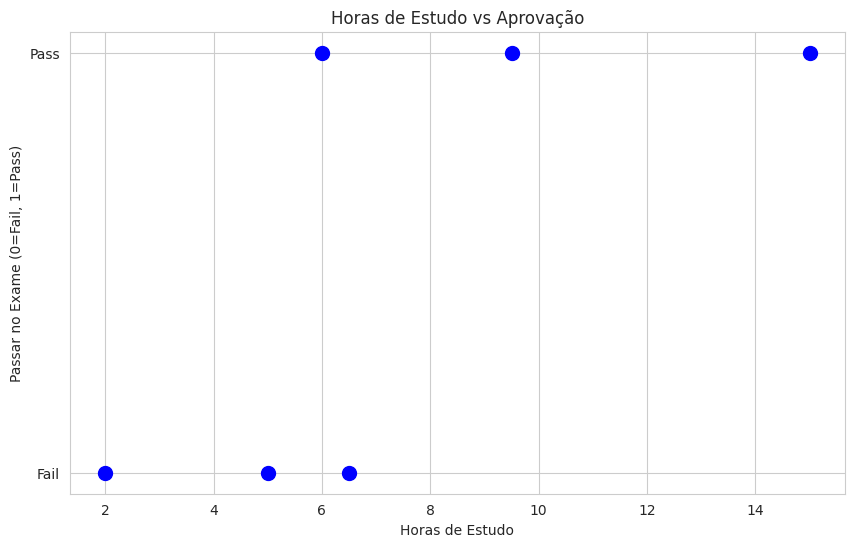

In [ ]:
plt.scatter(df['Hours_Studied'], df['Pass_binary'], color='blue', s=100)
plt.xlabel("Horas de Estudo")
plt.ylabel("Passar no Exame (0=Fail, 1=Pass)")
plt.title("Horas de Estudo vs Aprovação")
plt.yticks([0, 1], ['Fail', 'Pass'])
plt.show()

## 4. Criando o modelo de Regressão Logística
Agora vamos treinar o modelo de regressão logística para prever a probabilidade de aprovação com base nas horas de estudo.

In [ ]:
X = df[['Hours_Studied']]
y = df['Pass_binary']

model = LogisticRegression()
model.fit(X, y)

print("Intercepto:", model.intercept_)
print("Coeficiente:", model.coef_)

Intercepto: [-4.49184834]
Coeficiente: [[0.67076385]]


## 5. Visualizando a curva de probabilidade
A regressão logística nos dá uma **curva em forma de S (sigmóide)** que mostra como a probabilidade de aprovação aumenta com as horas de estudo.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


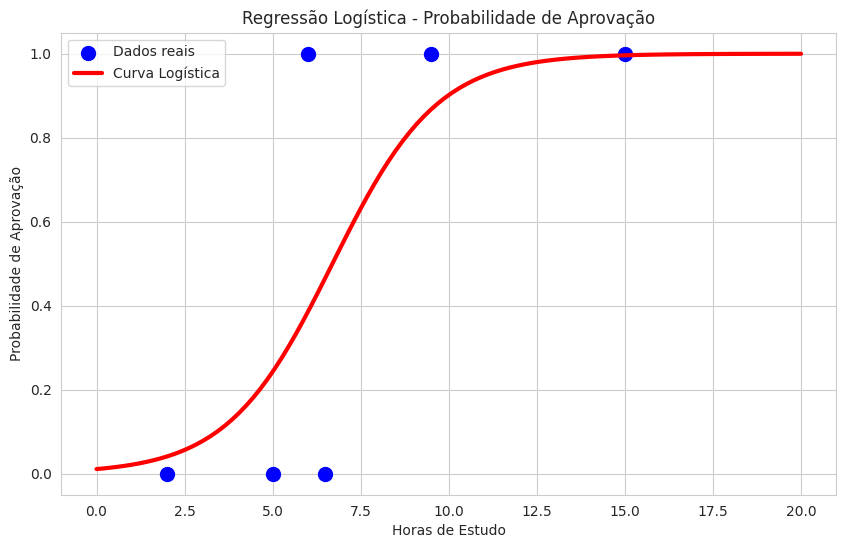

In [ ]:
horas_teste = np.linspace(0, 20, 100).reshape(-1,1)
probabilidades = model.predict_proba(horas_teste)[:,1]

plt.scatter(df['Hours_Studied'], df['Pass_binary'], color='blue', s=100, label='Dados reais')
plt.plot(horas_teste, probabilidades, color='red', linewidth=3, label='Curva Logística')
plt.xlabel("Horas de Estudo")
plt.ylabel("Probabilidade de Aprovação")
plt.title("Regressão Logística - Probabilidade de Aprovação")
plt.legend()
plt.show()

## 6. Fazendo previsões
Podemos prever a probabilidade de aprovação para um estudante que estude um número específico de horas.

In [ ]:
horas = 20
prob_aprovacao = model.predict_proba([[horas]])[0][1]
print(f"Se o estudante estudar {horas} horas, a probabilidade de aprovação é de {prob_aprovacao*100:.2f}%")

Se o estudante estudar 20 horas, a probabilidade de aprovação é de 99.99%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Conclusão
Com a regressão logística, conseguimos estimar a probabilidade de aprovação de um estudante em função das horas de estudo.  
Esse mesmo método pode ser aplicado em diversas áreas do mundo real, como **previsão de riscos financeiros, diagnósticos médicos, marketing e mais**.